In [2]:
import pandas as pd
import numpy as np
import sklearn as scikit_learn
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from konlpy.tag import Okt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import urllib.request
# import mecab
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df=pd.read_excel('../data/최종_데이터셋.xlsx')

In [5]:
df.head()

,News,label,가격등락비율
0,종돈 종돈 마리 종돈 마리 수입 최고 종개 협 종개 협 신규 종개 협 신규 종돈 장...,1,1.397062
1,돈육 돈육 수입 돈육 수입 최고 자급 률 자급 률 하락 전 년비 전 년비 전 년비 ...,1,0.000632
2,지난해 지난해 수입 지난해 수입 돈육 소비 수입 수입 증가 재고 전지 전지 등 전지...,1,2.406873
3,안전 안전 한 생산 정부 농가 구제역 구제역 백신 구제역 백신 구제역 백신 접종 품...,1,10.301637
4,돈육 돈육 소비 돈육 소비 kg 전 년 kg 우리 우리 국민 우리 국민 돼지고기 돼...,1,9.492842


In [6]:
df=df.fillna("")

### 어떤 단어가 있는지

In [7]:
embedding_list=[]

for week_news in df['News']:
    embedding_list.append(str(week_news))

In [8]:
vocab=[]
for i in range(len(embedding_list)):
    vocab.append(embedding_list[i].split())

In [9]:
len(vocab)

208

In [10]:
vocab_1d=[num for row in vocab for num in row]

In [11]:
vocabulary=set(vocab_1d)

In [12]:
vocab_dic={}
vocab_price={}
vocab_sentiment={}

In [13]:
for i in range(len(embedding_list)):
    for word in vocabulary:
        if word in embedding_list[i]:
            if word in vocab_dic:
                    vocab_dic[word] += 1
                    vocab_price[word]+=df['가격등락비율'][i]
            else:
                    vocab_dic[word] = 1
                    vocab_price[word]=df['가격등락비율'][i]

In [14]:
vocab_price.get('ASF')

-77.47114616669407

### 단어 감정점수 구하는 공식

In [15]:
len(vocab_dic)

5365

In [16]:
for word in vocabulary:
    vocab_sentiment[word]=vocab_price.get(str(word))/vocab_dic.get(str(word))

In [17]:
vocab_sentiment

{'순간': 0.0,
 '공개': 1.7450958826821956,
 '대부분': -0.8270970224522081,
 '행동지침': 1.7416991860973554,
 '혈청': -0.7682207093671914,
 '먹거리': 0.0,
 '유래': 0.9892934068317254,
 '동선': 1.5000916246999645,
 '용도': 3.1679794688034586,
 '삽겹살': -2.497024353264673,
 '공급': 1.3699945890882654,
 '휴전선': -1.5233525555198804,
 '근': 0.24886769046865012,
 '강화하다': 0.7277001016770518,
 '드론': -6.404111710541097,
 '비도': 5.425188882309476,
 '증가': 0.30478078984194595,
 '덕분': 2.7814929023355743,
 '늘리다': 2.468389996821913,
 '대한민국': -1.770549678349079,
 '결정구조': 6.151123445391431,
 '호조': -0.5267527213440986,
 '탄탄하다': -4.062255460952582,
 '모범': 2.892479407197565,
 '같다': 0.0805116954723403,
 '권한': 2.090679988517745,
 '건축물': 3.996189929728527,
 '축소': -0.8337261765905181,
 '고령화': 22.07693272801172,
 '종속': -5.840986110507152,
 '목욕': 0.0,
 '반찬': 2.892479407197565,
 '박씨': 4.784071152247308,
 '일동면': 0.0,
 '폭압적': 0.0,
 '결제': 2.118789010847476,
 '경제': -0.011790934192698747,
 '차폐': -6.2493864727641,
 '유사시': -6.059092574500674,
 '상대'

In [18]:
dict = sorted(vocab_sentiment.items(), key=lambda x:x[1])

In [19]:
df_dict = pd.DataFrame(dict)
df_dict.columns=(['word','sentiment'])

In [20]:
df_dict.to_excel("./df_dict.xlsx")

In [21]:
dict

[('적성면', -44.67907497370927),
 ('유산', -34.02867384142676),
 ('군데', -23.37827270914425),
 ('양감면', -23.37827270914425),
 ('화성시', -23.37827270914425),
 ('염려', -23.37827270914425),
 ('제때', -23.37827270914425),
 ('형상', -23.37827270914425),
 ('홍수', -23.37827270914425),
 ('SFEED', -23.30893758616051),
 ('산차', -23.30893758616051),
 ('연례', -23.30893758616051),
 ('레터', -23.30893758616051),
 ('배부', -23.30893758616051),
 ('모토로', -23.30893758616051),
 ('수컷', -23.30893758616051),
 ('개막식', -23.30893758616051),
 ('박스', -23.30893758616051),
 ('퍼포먼스', -23.30893758616051),
 ('갈말읍', -23.30893758616051),
 ('답지', -23.30893758616051),
 ('곤두박질', -23.30893758616051),
 ('정호영', -23.30893758616051),
 ('찾기', -23.30893758616051),
 ('모자라', -23.30893758616051),
 ('유영국', -23.30893758616051),
 ('김명규', -23.30893758616051),
 ('사이드', -23.30893758616051),
 ('김성중', -23.30893758616051),
 ('암컷', -23.30893758616051),
 ('쉐프', -23.30893758616051),
 ('성대', -23.30893758616051),
 ('절대로', -23.30893758616051),
 ('안이', -23.30893758616

## 뉴스 감정분석

In [22]:
df.tail()

,News,label,가격등락비율
203,양돈 장 양돈 장 관리사 외국인 외국인 근로자 외국인 근로자 숙소 고용노동부 관리사...,1,3.996190
204,한 협회 정부 정부 전국 정부 전국 축산 농가 정부 전국 축산 농가 특별 정부 전국...,1,3.351271
205,출하 두 수가 출하 두 수가 최고 최고 치르다 기록 또 올해 출하 두 수가 출하 두...,2,-12.467987
206,작년 작년 세계 작년 세계 주요 작년 세계 주요 돈육 작년 세계 주요 돈육 수 출국...,2,-10.239710
207,정부 포괄 적 점진 적 환태평양 경 제 동반 자 협정 CPTPP 가입 가입 추진 공...,2,0.000000


In [23]:
for i in range(df.shape[0]):
     df['News'].iloc[i]=df['News'].iloc[i].split()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_6960\1661348746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['News'].iloc[i]=df['News'].iloc[i].split()


### 해당하는 뉴스에 키워드에 감정점수 맵핑하기

In [24]:
df['News_sentiment']=0
df['News_sentiment_AVG']=0

In [25]:
for i in range(df.shape[0]):
    for j in range(len(df['News'][i])):
        if df['News'][i][j] in vocab_sentiment:
            df['News_sentiment'][i]+=vocab_sentiment[df['News'][i][j]]
    df['News_sentiment_AVG'][i]=df['News_sentiment'][i]/len(df['News'][i])

C:\Users\jaemin\AppData\Local\Temp\ipykernel_6960\337410577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['News_sentiment'][i]+=vocab_sentiment[df['News'][i][j]]
C:\Users\jaemin\AppData\Local\Temp\ipykernel_6960\337410577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['News_sentiment_AVG'][i]=df['News_sentiment'][i]/len(df['News'][i])
C:\Users\jaemin\AppData\Local\Temp\ipykernel_6960\337410577.py:5: RuntimeWarning: invalid value encountered in double_scalars
  df['News_sentiment_AVG'][i]=df['News_sentiment'][i]/len(df['News'][i])


In [26]:
vocab_sentiment

{'순간': 0.0,
 '공개': 1.7450958826821956,
 '대부분': -0.8270970224522081,
 '행동지침': 1.7416991860973554,
 '혈청': -0.7682207093671914,
 '먹거리': 0.0,
 '유래': 0.9892934068317254,
 '동선': 1.5000916246999645,
 '용도': 3.1679794688034586,
 '삽겹살': -2.497024353264673,
 '공급': 1.3699945890882654,
 '휴전선': -1.5233525555198804,
 '근': 0.24886769046865012,
 '강화하다': 0.7277001016770518,
 '드론': -6.404111710541097,
 '비도': 5.425188882309476,
 '증가': 0.30478078984194595,
 '덕분': 2.7814929023355743,
 '늘리다': 2.468389996821913,
 '대한민국': -1.770549678349079,
 '결정구조': 6.151123445391431,
 '호조': -0.5267527213440986,
 '탄탄하다': -4.062255460952582,
 '모범': 2.892479407197565,
 '같다': 0.0805116954723403,
 '권한': 2.090679988517745,
 '건축물': 3.996189929728527,
 '축소': -0.8337261765905181,
 '고령화': 22.07693272801172,
 '종속': -5.840986110507152,
 '목욕': 0.0,
 '반찬': 2.892479407197565,
 '박씨': 4.784071152247308,
 '일동면': 0.0,
 '폭압적': 0.0,
 '결제': 2.118789010847476,
 '경제': -0.011790934192698747,
 '차폐': -6.2493864727641,
 '유사시': -6.059092574500674,
 '상대'

### News_sentiment_AVG이 0이상이면 1, 0미만 2로 라벨링 한다.

In [27]:
df_sorted = df.sort_values('News_sentiment_AVG', ascending=True)

In [28]:
def label_positive(x):
    if x >= 0:
        return 1
    else:
        return 2

# 'News_sentiment_AVG_label' 컬럼에 함수 적용하여 라벨링
df['News_sentiment_AVG_label'] = df['News_sentiment_AVG'].apply(label_positive)

df['new_label']=df['label']

df.loc[df['new_label'] == 0, 'new_label'] = 1

label_percentage=((df['new_label']==df['News_sentiment_AVG_label']).sum()/208)*100

# 가격증가 비율하고 가격감정비율하고 78프로로 일치함
label_percentage

78.36538461538461

In [29]:
df

,News,label,가격등락비율,News_sentiment,News_sentiment_AVG,News_sentiment_AVG_label,new_label
0,"[종돈, 종돈, 마리, 종돈, 마리, 수입, 최고, 종개, 협, 종개, 협, 신규,...",1,1.397062,479.978492,0.388962,1,1
1,"[돈육, 돈육, 수입, 돈육, 수입, 최고, 자급, 률, 자급, 률, 하락, 전, ...",1,0.000632,658.570833,0.332276,1,1
2,"[지난해, 지난해, 수입, 지난해, 수입, 돈육, 소비, 수입, 수입, 증가, 재고...",1,2.406873,902.669177,0.484005,1,1
3,"[안전, 안전, 한, 생산, 정부, 농가, 구제역, 구제역, 백신, 구제역, 백신,...",1,10.301637,1700.895325,1.118274,1,1
4,"[돈육, 돈육, 소비, 돈육, 소비, kg, 전, 년, kg, 우리, 우리, 국민,...",1,9.492842,2155.213073,0.823229,1,1
5,"[값, 값, 최저, 전, 년비, 전, 년비, 전, 년비, 하락, 물량, 물량, 늘,...",2,-15.134758,-663.892677,-0.591178,2,2
6,[],2,-8.153108,0.000000,NaN,2,2
7,"[한, 한, 값, 한, 값, 강세, 취했, 농장, 농장, 성적, 퇴보, 작년, 작년...",1,7.325034,950.696349,0.777984,1,1
8,"[양돈, 장, 양돈, 장, 계속, 팔지, 농가, 고민, 고민, 중, 양돈, 양돈, ...",2,-5.840986,-501.779817,-0.196238,2,2
9,"[상반기, 상반기, 사료, 원료, 상반기, 사료, 원료, 가격, 상반기, 사료, 원...",1,1.063456,727.663218,0.465854,1,1


In [30]:
# 증가 유지 하락 비율을 나타낸다.
label_percentages =df['new_label'].value_counts(normalize=True) * 100

In [31]:
# 증가 유지 하락 비율을 나타낸다.
label_percentages

1    69.711538
2    30.288462
Name: new_label, dtype: float64

In [32]:
sentiment_percentages =df['News_sentiment_AVG'].value_counts(normalize=True) * 100

In [33]:
count_positive = ((df['News_sentiment_AVG'] >= 0).value_counts()[True]/208)*100

In [34]:
count_negative=100-((df['News_sentiment_AVG'] >= 0).value_counts()[True]/208)*100

In [35]:
count_negative

33.65384615384616

In [36]:
count_positive

66.34615384615384

In [37]:
df

,News,label,가격등락비율,News_sentiment,News_sentiment_AVG,News_sentiment_AVG_label,new_label
0,"[종돈, 종돈, 마리, 종돈, 마리, 수입, 최고, 종개, 협, 종개, 협, 신규,...",1,1.397062,479.978492,0.388962,1,1
1,"[돈육, 돈육, 수입, 돈육, 수입, 최고, 자급, 률, 자급, 률, 하락, 전, ...",1,0.000632,658.570833,0.332276,1,1
2,"[지난해, 지난해, 수입, 지난해, 수입, 돈육, 소비, 수입, 수입, 증가, 재고...",1,2.406873,902.669177,0.484005,1,1
3,"[안전, 안전, 한, 생산, 정부, 농가, 구제역, 구제역, 백신, 구제역, 백신,...",1,10.301637,1700.895325,1.118274,1,1
4,"[돈육, 돈육, 소비, 돈육, 소비, kg, 전, 년, kg, 우리, 우리, 국민,...",1,9.492842,2155.213073,0.823229,1,1
5,"[값, 값, 최저, 전, 년비, 전, 년비, 전, 년비, 하락, 물량, 물량, 늘,...",2,-15.134758,-663.892677,-0.591178,2,2
6,[],2,-8.153108,0.000000,NaN,2,2
7,"[한, 한, 값, 한, 값, 강세, 취했, 농장, 농장, 성적, 퇴보, 작년, 작년...",1,7.325034,950.696349,0.777984,1,1
8,"[양돈, 장, 양돈, 장, 계속, 팔지, 농가, 고민, 고민, 중, 양돈, 양돈, ...",2,-5.840986,-501.779817,-0.196238,2,2
9,"[상반기, 상반기, 사료, 원료, 상반기, 사료, 원료, 가격, 상반기, 사료, 원...",1,1.063456,727.663218,0.465854,1,1


In [38]:
df[['new_label','News_sentiment_AVG_label']]

,new_label,News_sentiment_AVG_label
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,2,2
6,2,2
7,1,1
8,2,2
9,1,1


## 모델링

In [68]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [69]:
df['News_sentiment_AVG'].fillna(df.mean(),inplace=True) 

C:\Users\jaemin\AppData\Local\Temp\ipykernel_15760\711443574.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df['News_sentiment_AVG'].fillna(df.mean(),inplace=True)


In [70]:
train,test=train_test_split(df,test_size=0.2,shuffle=False)

In [71]:
train_T=TabularDataset(train[["News_sentiment_AVG","new_label"]])
test_T=TabularDataset(test[["News_sentiment_AVG","new_label"]])

In [72]:
# autogluon 
predictor = TabularPredictor(label='new_label',path='./model').fit(train_T)


Beginning AutoGluon training ...
AutoGluon will save models to "./model\"
AutoGluon Version:  0.7.0
Python Version:     3.8.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    166
Train Data Columns: 1
Label Column: new_label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 2]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 2, class 0 = 1
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (2) vs negative (1) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the dat

In [73]:
#학습된 모델 로드하기
predictor = TabularPredictor.load('./model') 

In [74]:
prediction=predictor.predict(test_T)

In [75]:
predict=predictor.evaluate_predictions(test_T.iloc[:,-1], prediction)

Evaluation: accuracy on test data: 0.8571428571428571
Evaluations on test data:
{
    "accuracy": 0.8571428571428571,
    "balanced_accuracy": 0.790450928381963,
    "mcc": 0.6544782449931849,
    "f1": 0.7272727272727274,
    "precision": 0.8888888888888888,
    "recall": 0.6153846153846154
}


In [76]:
predict

{'accuracy': 0.8571428571428571,
 'balanced_accuracy': 0.790450928381963,
 'mcc': 0.6544782449931849,
 'f1': 0.7272727272727274,
 'precision': 0.8888888888888888,
 'recall': 0.6153846153846154}

In [77]:
accuracy = accuracy_score(prediction, test_T.iloc[:,-1])

In [78]:
accuracy

0.8571428571428571

In [79]:
pre=predictor.leaderboard(test_T, extra_metrics=['accuracy', 'balanced_accuracy', 'log_loss'],silent=True)

In [80]:
pre

,model,score_test,accuracy,balanced_accuracy,log_loss,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsUnif,0.904762,0.904762,0.846154,-1.081568,0.794118,0.009001,0.010002,0.005001,0.009001,0.010002,0.005001,1,True,1
1,NeuralNetFastAI,0.904762,0.904762,0.867374,-0.616177,0.794118,0.011001,0.008002,0.610100,0.011001,0.008002,0.610100,1,True,10
2,LightGBM,0.880952,0.880952,0.828912,-0.423474,0.794118,0.001000,0.001000,0.239255,0.001000,0.001000,0.239255,1,True,4
3,LightGBMLarge,0.857143,0.857143,0.790451,-0.454616,0.794118,0.001000,0.001001,0.275063,0.001000,0.001001,0.275063,1,True,13
4,NeuralNetTorch,0.857143,0.857143,0.790451,-0.323256,0.823529,0.005001,0.003001,0.503114,0.005001,0.003001,0.503114,1,True,12
5,WeightedEnsemble_L2,0.857143,0.857143,0.790451,-0.323256,0.823529,0.007001,0.003001,0.827188,0.002000,0.000000,0.324074,2,True,14
6,LightGBMXT,0.833333,0.833333,0.751989,-0.419698,0.794118,0.001000,0.001001,0.226056,0.001000,0.001001,0.226056,1,True,3
7,CatBoost,0.833333,0.833333,0.751989,-0.398815,0.794118,0.002001,0.003000,0.482114,0.002001,0.003000,0.482114,1,True,7
8,XGBoost,0.809524,0.809524,0.692308,-0.421567,0.794118,0.010003,0.002001,0.120026,0.010003,0.002001,0.120026,1,True,11
9,KNeighborsDist,0.785714,0.785714,0.696286,-1.147877,0.705882,0.007002,0.008002,0.004001,0.007002,0.008002,0.004001,1,True,2


In [81]:
pre.iloc[:,[0,2,4]].to_excel("./model/acc_table.xlsx",index=False)

In [82]:
predictor.get_model_best()

'WeightedEnsemble_L2'

### 혼동 행렬 만들기

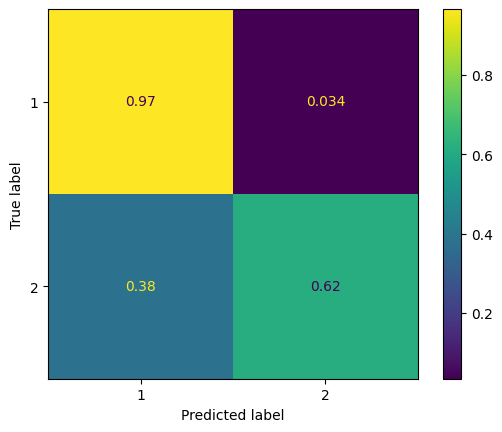

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(test_T.iloc[:,-1], prediction)

cm = confusion_matrix(test_T.iloc[:,-1], prediction, labels=[1,2],normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,2])
disp.plot()
plt.show()

In [84]:
confusion_matrix(test_T.iloc[:,-1], prediction)

array([[28,  1],
       [ 5,  8]], dtype=int64)

### Accuracy, Recall, Precision, F1-Score

In [95]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('정확도:', accuracy_score(test_T.iloc[:,-1], prediction))
print('recall(재현율):', recall_score(test_T.iloc[:,-1], prediction,average='micro'))
print('precision(정밀도):', precision_score(test_T.iloc[:,-1], prediction,average='micro'))
print('F1점수:', f1_score(test_T.iloc[:,-1], prediction,average='micro'))


정확도: 0.8571428571428571
recall(재현율): 0.8571428571428571
precision(정밀도): 0.8571428571428571
F1점수: 0.8571428571428571


In [100]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('정확도:', accuracy_score(test_T.iloc[:,-1], prediction))
print('recall(재현율):', recall_score(test_T.iloc[:,-1], prediction))
print('precision(정밀도):', precision_score(test_T.iloc[:,-1], prediction))
print('F1점수:', f1_score(test_T.iloc[:,-1], prediction))


정확도: 0.8571428571428571
recall(재현율): 0.9655172413793104
precision(정밀도): 0.8484848484848485
F1점수: 0.9032258064516129


In [91]:
test_T.iloc[:,-1]

166    1
167    1
168    1
169    1
170    1
171    1
172    1
173    1
174    2
175    1
176    2
177    1
178    1
179    1
180    1
181    2
182    1
183    2
184    2
185    2
186    1
187    1
188    1
189    1
190    1
191    1
192    1
193    1
194    1
195    2
196    2
197    2
198    1
199    1
200    2
201    1
202    1
203    1
204    1
205    2
206    2
207    2
Name: new_label, dtype: int64

### 모델결과 막대그래프 그리기

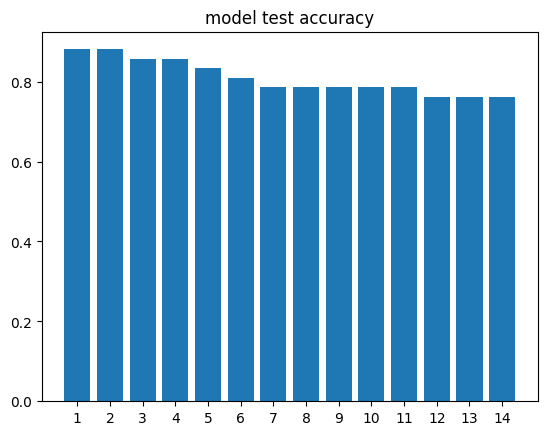

In [86]:
import matplotlib.pyplot as plt
import numpy as np
plt.title("model test accuracy")
x=list(range(1,15))
model = [
'KNeighborsUnif',
'WeightedEnsemble_L2',
'CatBoost',
'NeuralNetFastAI',
'LightGBMXT',
'XGBoost',
'LightGBM',
'LightGBMLarge',
'NeuralNetTorch',
'ExtraTreesGini',
'ExtraTreesEntr',
'KNeighborsDist',
'RandomForestEntr',
'RandomForestGini']
values = [  0.880952, 0.880952, 0.857143, 0.857143, 0.833333, 0.809524, 0.785714, 0.785714, 0.785714, 0.785714, 0.785714, 0.761905,  0.761905, 0.761905]
plt.xticks(range(1,15), range(1,15)) 
plt.bar(x,values)

plt.show()

C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47561 (\N{HANGUL SYLLABLE MAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas

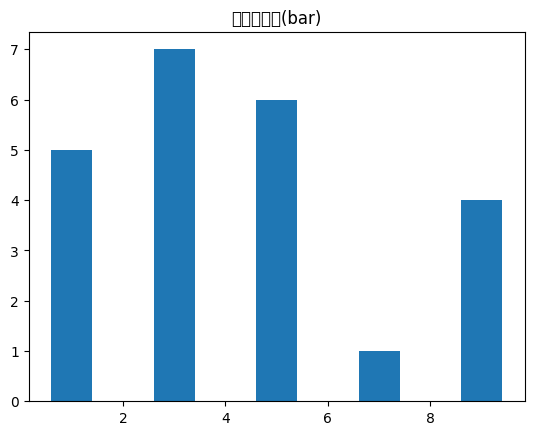

In [87]:
plt.title("막대그래프(bar)")
x_data=[1,3,5,7,9]
y_data=[5,7,6,1,4]
plt.bar(x_data,y_data) #bar(막대를 표시할 위치, 막대의 높이)
plt.show()

In [88]:
predictor.feature_importance(data=test_T)

Computing feature importance via permutation shuffling for 1 features using 42 rows with 5 shuffle sets...
	0.08s	= Expected runtime (0.02s per shuffle set)
	0.04s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
News_sentiment_AVG,0.266667,0.088127,0.001245,5,0.448122,0.085211
